In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')
# 코랩코드

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import warnings

from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')


In [121]:
#코랩 코드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [4]:
import matplotlib

#코랩 코드
# # 맑은 고딕 적용
# matplotlib.rc("font", family = "NanumBarunGothic")
# # 음수 표시
# matplotlib.rc('axes', unicode_minus=False)

import matplotlib

# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

In [8]:
# 실행결과 경고메시지 출력 제외
import warnings
import platform
warnings.filterwarnings('ignore')

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
df_raw = pd.read_csv("/content/drive/MyDrive/python_posco/Car.csv", encoding = 'euc-kr')
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [52]:
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [53]:
df_raw.info() #데이터 열 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [54]:
df_raw.isnull().sum()

,0
Name,0
Location,0
Price,1053
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [55]:
df_raw['Price'].describe()

,Price
count,6200.000000
mean,14912.514750
std,17674.318464
min,7.080000
25%,5365.360000
50%,8814.520000
75%,15869.972500
max,245273.600000


In [56]:
#결측치 처리
df = df_raw
df.drop(labels = 'New_Price', axis = 1, inplace = True) #New_Price의 결측값이 너무 많이 발견되어, New_Price 열을 삭제하기로 결정

In [57]:
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [58]:
df.dropna(subset = ['Price'], inplace = True) #Price의 결측값 삭제 (목표변수)

In [59]:
df[df['Mileage'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
4446,Mahindra E Verito D4,Chennai,19928.48,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0
4904,Toyota Prius 2009-2016 Z4,Mumbai,19545.24,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0


네임과 fuel 이 모두 동일 한게 없다. Drop

In [61]:
df.dropna(subset = ['Mileage'], inplace = True)

In [62]:
df[df['Engine'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN
208,Maruti Swift 1.3 VXi,Kolkata,3234.55,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
733,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN
749,Land Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN
1294,Honda City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN
1327,Maruti Swift 1.3 ZXI,Hyderabad,8891.17,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
1385,Honda City 1.5 GXI,Pune,2299.44,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,62667.40,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN
2074,Maruti Swift 1.3 LXI,Pune,4828.82,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
2096,Hyundai Santro LP zipPlus,Coimbatore,2958.61,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN


In [63]:
df[df['Engine'].isnull()].merge(
    df,
    on=['Name', 'Fuel_Type', 'Year'],
    how='inner',
    suffixes=('_null', '_match')
)

,Name,Location_null,Price_null,Year,Kilometers_Driven_null,Fuel_Type,Transmission_null,Owner_Type_null,Mileage_null,Engine_null,...,Seats_null,Location_match,Price_match,Kilometers_Driven_match,Transmission_match,Owner_Type_match,Mileage_match,Engine_match,Power_match,Seats_match
0,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,...,NaN,Ahmedabad,4522.23,60006,Manual,First,0.0 kmpl,NaN,NaN,NaN
1,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,...,NaN,Jaipur,3525.81,75055,Manual,First,12.8 kmpl,1493 CC,100 bhp,5.0
2,Maruti Swift 1.3 VXi,Kolkata,3234.55,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,...,NaN,Kolkata,3234.55,42001,Manual,First,16.1 kmpl,NaN,NaN,NaN
3,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,...,NaN,Chennai,2682.68,97800,Manual,Third,16.1 kmpl,NaN,NaN,NaN
4,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,...,NaN,Jaipur,3602.46,125000,Manual,Fourth & Above,16.1 kmpl,NaN,NaN,NaN
5,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,...,NaN,Delhi,2452.74,63000,Manual,First,16.1 kmpl,NaN,NaN,NaN
6,Land Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,...,NaN,Mumbai,40623.44,55001,Automatic,Second,0.0 kmpl,NaN,NaN,NaN
7,Honda City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,...,NaN,Delhi,4905.47,55005,Manual,First,12.8 kmpl,NaN,NaN,NaN
8,Maruti Swift 1.3 ZXI,Hyderabad,8891.17,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,...,NaN,Hyderabad,8891.17,50295,Manual,First,16.1 kmpl,NaN,NaN,NaN
9,Honda City 1.5 GXI,Pune,2299.44,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,...,NaN,Pune,2299.44,115000,Manual,Second,0.0 kmpl,NaN,NaN,NaN


In [64]:
# 각 그룹별 고유한 Engine 값 개수를 확인
engine_counts = df.groupby(['Name', 'Fuel_Type', 'Year'])['Engine'].nunique()

# 고유한 Engine 값이 딱 하나만 존재하는 그룹을 필터링
valid_groups = engine_counts[engine_counts == 1].index

# Engine 값이 NaN인 경우, 같은 Name, Fuel_Type, Year 그룹에서 유일한 값을 대체
def fill_unique_engine(row):
    if pd.isna(row['Engine']):  # Engine 값이 NaN인 경우
        group = (row['Name'], row['Fuel_Type'], row['Year'])
        if group in valid_groups:  # 해당 그룹이 유일한 Engine 값을 가질 때만 대체
            return df.loc[(df['Name'] == row['Name']) &
                              (df['Fuel_Type'] == row['Fuel_Type']) &
                              (df['Year'] == row['Year']), 'Engine'].dropna().iloc[0]
    return row['Engine']  # 조건을 만족하지 않으면 원래 값 유지

# 적용
df['Engine'] = df.apply(fill_unique_engine, axis=1)


In [65]:
df[df['Engine'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
208,Maruti Swift 1.3 VXi,Kolkata,3234.55,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
733,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN
749,Land Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN
1294,Honda City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN
1327,Maruti Swift 1.3 ZXI,Hyderabad,8891.17,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
1385,Honda City 1.5 GXI,Pune,2299.44,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,62667.40,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN
2074,Maruti Swift 1.3 LXI,Pune,4828.82,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
2096,Hyundai Santro LP zipPlus,Coimbatore,2958.61,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN
2264,Toyota Etios Liva V,Pune,4522.23,2012,24500,Petrol,Manual,Second,18.3 kmpl,NaN,NaN,NaN


In [66]:
df.isnull().sum()

,0
Name,0
Location,0
Price,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,35


In [67]:
df.dropna(subset = ['Engine'], inplace = True)

In [68]:
df.isnull().sum()

,0
Name,0
Location,0
Price,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [69]:
df[df['Power'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,1493 CC,NaN,NaN


In [70]:
# 각 그룹별 고유한 Engine 값 개수를 확인
Power_counts = df.groupby(['Name'])['Power'].nunique()

# 고유한 Engine 값이 딱 하나만 존재하는 그룹을 필터링
valid_groups = Power_counts[Power_counts == 1].index

# Engine 값이 NaN인 경우, 같은 Name, Fuel_Type, Year 그룹에서 유일한 값을 대체
def fill_unique_engine(row):
    if pd.isna(row['Power']):  # Engine 값이 NaN인 경우
        group = (row['Name'], row['Fuel_Type'], row['Year'])
        if group in valid_groups:  # 해당 그룹이 유일한 Engine 값을 가질 때만 대체
            return df.loc[(df['Name'] == row['Name']) &
                              (df['Fuel_Type'] == row['Fuel_Type']) &
                              (df['Year'] == row['Year']), 'Power'].dropna().iloc[0]
    return row['Power']  # 조건을 만족하지 않으면 원래 값 유지

# 적용
df['Power'] = df.apply(fill_unique_engine, axis=1)


In [71]:
df[df['Power'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,1493 CC,NaN,NaN


In [72]:
df.dropna(subset = ['Power'], inplace = True)

In [73]:
df.isnull().sum()

,0
Name,0
Location,0
Price,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [74]:
# 각 그룹별 고유한 Seats 값 개수를 확인
Seats_counts = df.groupby(['Name'])['Seats'].nunique()

# 고유한 Seats 값이 딱 하나만 존재하는 그룹을 필터링
valid_groups = Seats_counts[Seats_counts == 1].index

# Seats 값이 NaN인 경우, 같은 Name, Fuel_Type, Year 그룹에서 유일한 값을 대체
def fill_unique_Seats(row):
    if pd.isna(row['Seats']):  # Seats 값이 NaN인 경우
        group = (row['Name'], row['Fuel_Type'], row['Year'])
        if group in valid_groups:  # 해당 그룹이 유일한 Seats 값을 가질 때만 대체
            return df.loc[(df['Name'] == row['Name']) &
                              (df['Fuel_Type'] == row['Fuel_Type']) &
                              (df['Year'] == row['Year']), 'Seats'].dropna().iloc[0]
    return row['Seats']  # 조건을 만족하지 않으면 원래 값 유지

# 적용
df['Seats'] = df.apply(fill_unique_Seats, axis=1)

In [75]:
df[df['Seats'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
229,Ford Figo Diesel,Bangalore,5518.66,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN
1917,Honda City 1.5 EXI,Jaipur,2606.03,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN
2369,Maruti Estilo LXI,Chennai,2299.44,2008,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN
3800,Ford Endeavour Hurricane LE,Mumbai,10730.72,2012,129000,Diesel,Automatic,First,12.8 kmpl,2953 CC,null bhp,NaN
3882,Maruti Estilo LXI,Kolkata,3832.40,2010,40000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN
5893,Maruti Estilo LXI,Chennai,2682.68,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN


In [76]:
df.dropna(subset = ['Seats'], inplace = True)

In [77]:
df.isnull().sum()

,0
Name,0
Location,0
Price,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


df 결측치 처리 완료된 데이터 프레임

#이상치

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [80]:
df.isnull().sum()

,0
Name,0
Location,0
Price,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [81]:
df['Model'] = df['Name'].apply(lambda x: x.split()[0])
df


,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0,Tata
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,Ford
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0,Jeep
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,Maruti


In [82]:
df['Model'] = df['Name'].apply(lambda x: x.split()[0])
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0,Tata
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,Ford
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0,Jeep
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,Maruti


In [83]:
df[["Mileage","Mileage_Unit"]] = df["Mileage"].str.split(' ',expand=True)
df[["Power","Power_Unit"]] = df["Power"].str.split(' ',expand=True)
df[["Engine","Engine_Unit"]] = df["Engine"].str.split(' ',expand=True)
df.drop(columns=["Mileage_Unit","Power_Unit","Engine_Unit"],inplace=True)

In [84]:
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047,69,5.0,Tata
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.0,1497,121.36,5.0,Ford
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.0,1368,160,5.0,Jeep
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.3,1248,88.5,5.0,Maruti


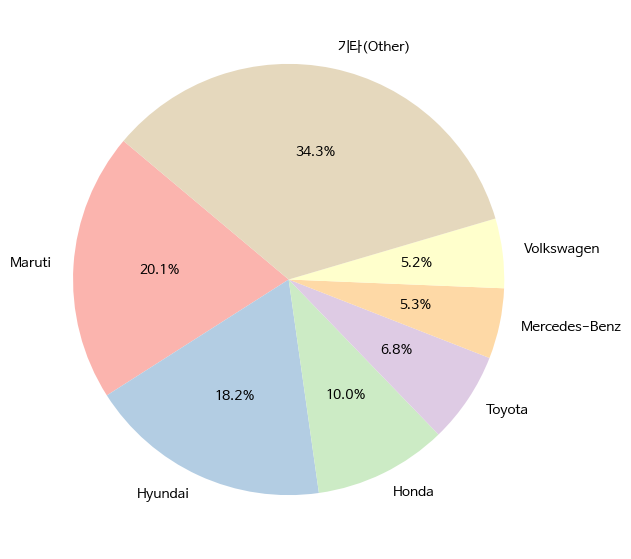

In [85]:
car_counts = df['Model'].value_counts()
total_count = car_counts.sum()
threshold = 0.05 * total_count
filtered_counts = car_counts[car_counts > threshold]
other_count = car_counts[car_counts <= threshold].sum()
if other_count > 0:
    filtered_counts['기타(Other)'] = other_count
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in range(len(filtered_counts))]
plt.figure(figsize=(7, 7))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.show()

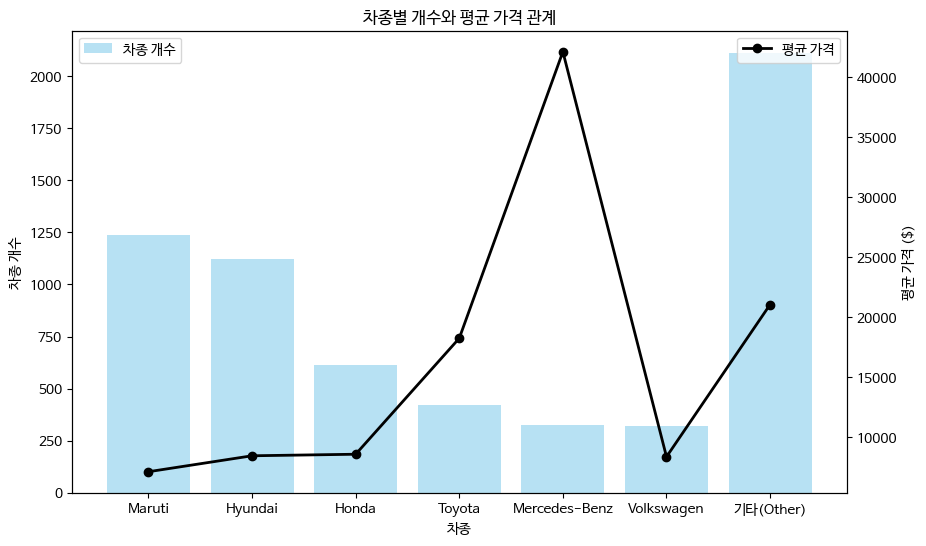

In [86]:
car_counts = df['Model'].value_counts()
total_count = car_counts.sum()
threshold = 0.05 * total_count
filtered_counts = car_counts[car_counts > threshold]
other_count = car_counts[car_counts <= threshold].sum()
if other_count > 0:
    filtered_counts['기타(Other)'] = other_count
average_prices = df.groupby('Model')['Price'].mean()

# '기타' 항목의 평균 가격 계산 (해당 차종들의 평균 가격을 가중 평균으로 합산)
if other_count > 0:
    other_avg_price = df[df['Model'].isin(car_counts[car_counts <= threshold].index)]['Price'].mean()
    average_prices.loc['기타(Other)'] = other_avg_price

# 필터링된 차종의 평균 가격만 가져오기
filtered_avg_prices = average_prices.loc[filtered_counts.index]

# 시각화: 차종별 개수 & 평균 가격 비교
fig, ax1 = plt.subplots(figsize=(10, 6))

# 바 그래프 (차종별 개수)
color1 = 'skyblue'
ax1.bar(filtered_counts.index, filtered_counts.values, color=color1, alpha=0.6, label='차종 개수')
ax1.set_xlabel('차종')
ax1.set_ylabel('차종 개수', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 가격 축 (차종별 평균 가격)
ax2 = ax1.twinx()
color2 = 'black'
ax2.plot(filtered_avg_prices.index, filtered_avg_prices.values, color=color2, marker='o', linestyle='-', linewidth=2, label='평균 가격')
ax2.set_ylabel('평균 가격 ($)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# 타이틀 및 레전드 추가
plt.title('차종별 개수와 평균 가격 관계')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

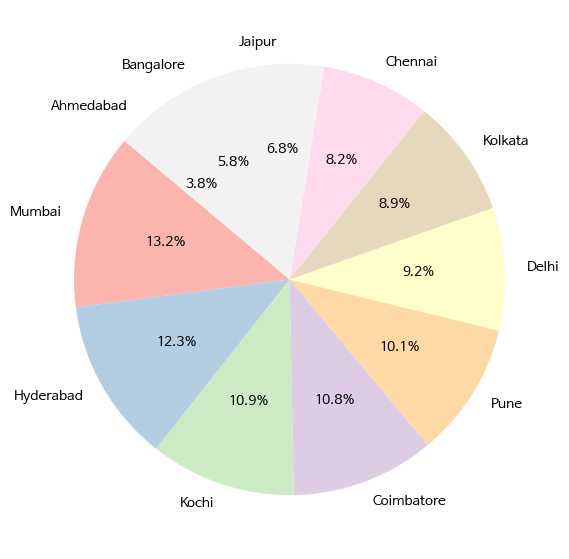

In [87]:
df_location = df["Location"].value_counts()
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in range(len(df_location))]
plt.figure(figsize=(7, 7))
plt.pie(df_location, labels=df_location.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.show()

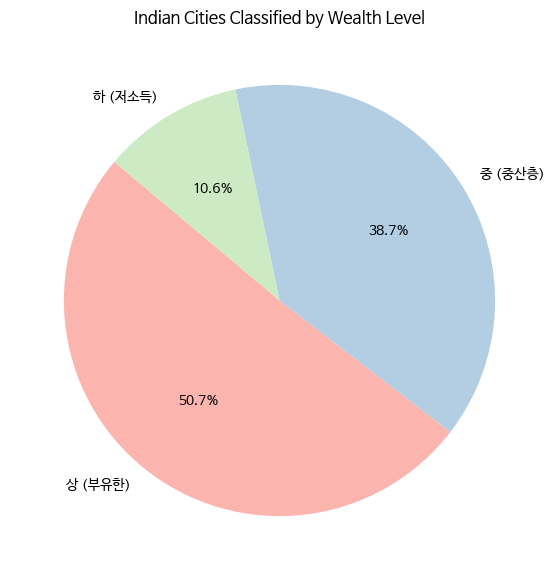

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# 기존 데이터에서 지역별 개수 추출
df_location = df["Location"].value_counts()

# 📌 지역 그룹화 기준 (상, 중, 하)
rich_areas = ["Mumbai", "Delhi", "Bangalore", "Pune", "Hyderabad"]
middle_areas = ["Chennai", "Kolkata", "Coimbatore", "Kochi"]
poor_areas = ["Ahmedabad", "Jaipur"]

# 📌 부유한(상), 중산층(중), 저소득(하)으로 그룹화
category_counts = {"상 (부유한)": 0, "중 (중산층)": 0, "하 (저소득)": 0}

for location, count in df_location.items():
    if location in rich_areas:
        category_counts["상 (부유한)"] += count
    elif location in middle_areas:
        category_counts["중 (중산층)"] += count
    elif location in poor_areas:
        category_counts["하 (저소득)"] += count

# 📌 데이터프레임으로 변환
df_grouped = pd.Series(category_counts)

# 📌 파이 차트 색상 설정
cmap = plt.get_cmap("Pastel1")
colors = [cmap(i) for i in range(len(df_grouped))]

# 📌 파이 차트 생성
plt.figure(figsize=(7, 7))
plt.pie(df_grouped, labels=df_grouped.index, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Indian Cities Classified by Wealth Level")
plt.show()


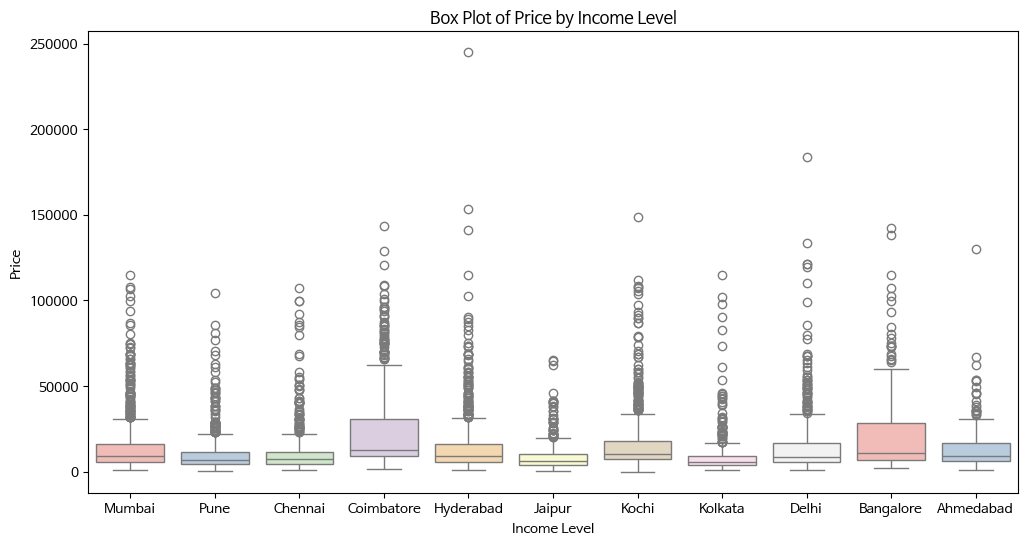

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Location", y="Price", data=df, palette="Pastel1")
plt.xlabel("Income Level")
plt.ylabel("Price")
plt.title("Box Plot of Price by Income Level")
plt.show()

In [90]:
rich_areas = ["Mumbai", "Delhi", "Bangalore", "Pune", "Hyderabad"]
middle_areas = ["Chennai", "Kolkata", "Coimbatore", "Kochi"]
poor_areas = ["Ahmedabad", "Jaipur"]

def classify_income(location):
    if location in rich_areas:
        return "상 (부유한)"
    elif location in middle_areas:
        return "중 (중산층)"
    elif location in poor_areas:
        return "하 (저소득)"
    else:
        return "기타"

df["Income Level"] = df["Location"].apply(classify_income)
df.drop(["Location"],axis=1,inplace=True)

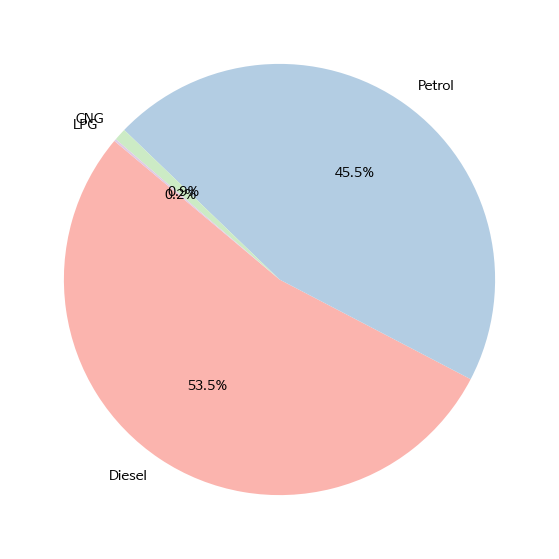

In [91]:
df_location = df["Fuel_Type"].value_counts()
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in range(len(df_location))]
plt.figure(figsize=(15, 7))
plt.pie(df_location, labels=df_location.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.show()

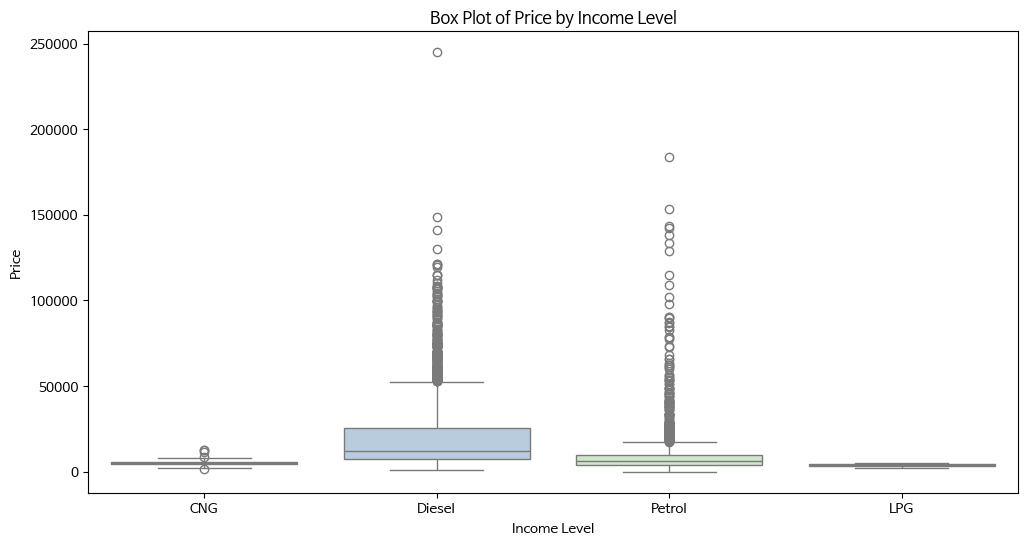

In [92]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Fuel_Type", y="Price", data=df, palette="Pastel1")
plt.xlabel("Income Level")
plt.ylabel("Price")
plt.title("Box Plot of Price by Income Level")
plt.show()

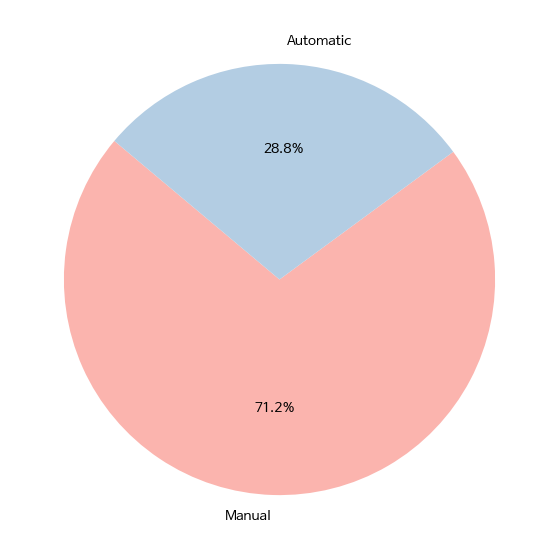

In [93]:
df_location = df["Transmission"].value_counts()
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in range(len(df_location))]
plt.figure(figsize=(15, 7))
plt.pie(df_location, labels=df_location.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.show()

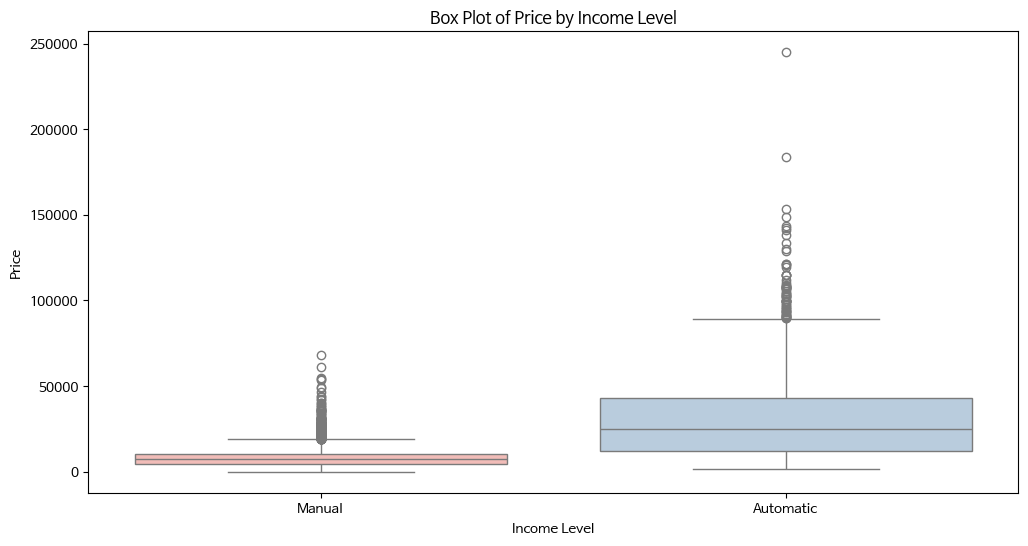

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Transmission", y="Price", data=df, palette="Pastel1")
plt.xlabel("Income Level")
plt.ylabel("Price")
plt.title("Box Plot of Price by Income Level")
plt.show()

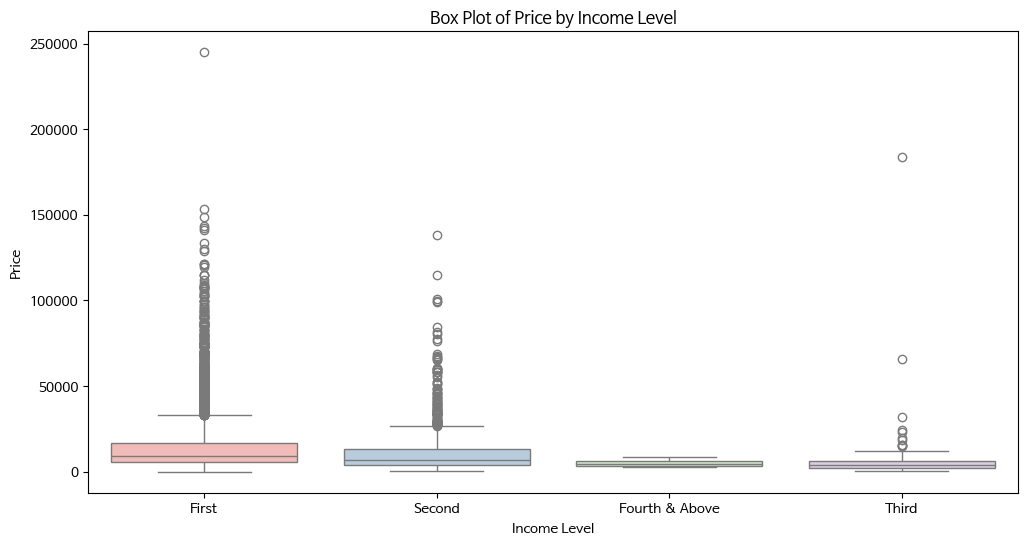

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Owner_Type", y="Price", data=df, palette="Pastel1")
plt.xlabel("Income Level")
plt.ylabel("Price")
plt.title("Box Plot of Price by Income Level")
plt.show()

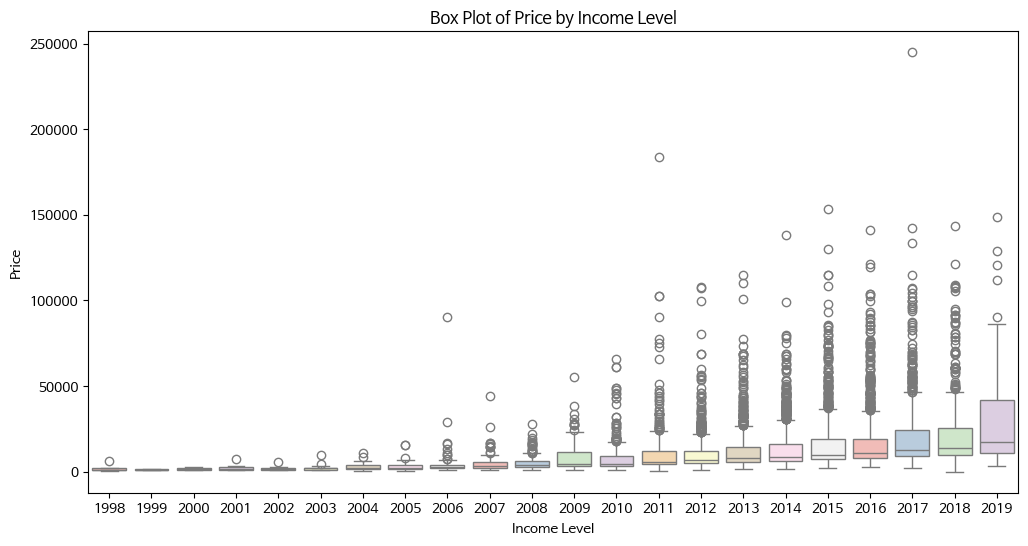

In [96]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Year", y="Price", data=df, palette="Pastel1")
plt.xlabel("Income Level")
plt.ylabel("Price")
plt.title("Box Plot of Price by Income Level")
plt.show()

In [97]:
df.head()

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income Level
0,Maruti Wagon R LXI CNG,2682.68,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,Maruti,상 (부유한)
1,Hyundai Creta 1.6 CRDi SX Option,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,Hyundai,상 (부유한)
2,Honda Jazz V,6898.32,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,Honda,중 (중산층)
3,Maruti Ertiga VDI,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,Maruti,중 (중산층)
4,Audi A4 New 2.0 TDI Multitronic,27194.71,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,Audi,중 (중산층)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 0 to 7236
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6156 non-null   object 
 1   Price              6156 non-null   float64
 2   Year               6156 non-null   int64  
 3   Kilometers_Driven  6156 non-null   int64  
 4   Fuel_Type          6156 non-null   object 
 5   Transmission       6156 non-null   object 
 6   Owner_Type         6156 non-null   object 
 7   Mileage            6156 non-null   object 
 8   Engine             6156 non-null   object 
 9   Power              6156 non-null   object 
 10  Seats              6156 non-null   float64
 11  Model              6156 non-null   object 
 12  Income Level       6156 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 673.3+ KB


#이상치 제거

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 0 to 7236
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6156 non-null   object 
 1   Price              6156 non-null   float64
 2   Year               6156 non-null   int64  
 3   Kilometers_Driven  6156 non-null   int64  
 4   Fuel_Type          6156 non-null   object 
 5   Transmission       6156 non-null   object 
 6   Owner_Type         6156 non-null   object 
 7   Mileage            6156 non-null   object 
 8   Engine             6156 non-null   object 
 9   Power              6156 non-null   object 
 10  Seats              6156 non-null   float64
 11  Model              6156 non-null   object 
 12  Income Level       6156 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 673.3+ KB


In [101]:
df['Mileage'] = df['Mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Engine'] = df['Engine'].str.extract(r'(\d+)').astype(float)  # 정수지만 float 처리
df['Power'] = df['Power'].str.extract(r'(\d+\.?\d*)').astype(float)


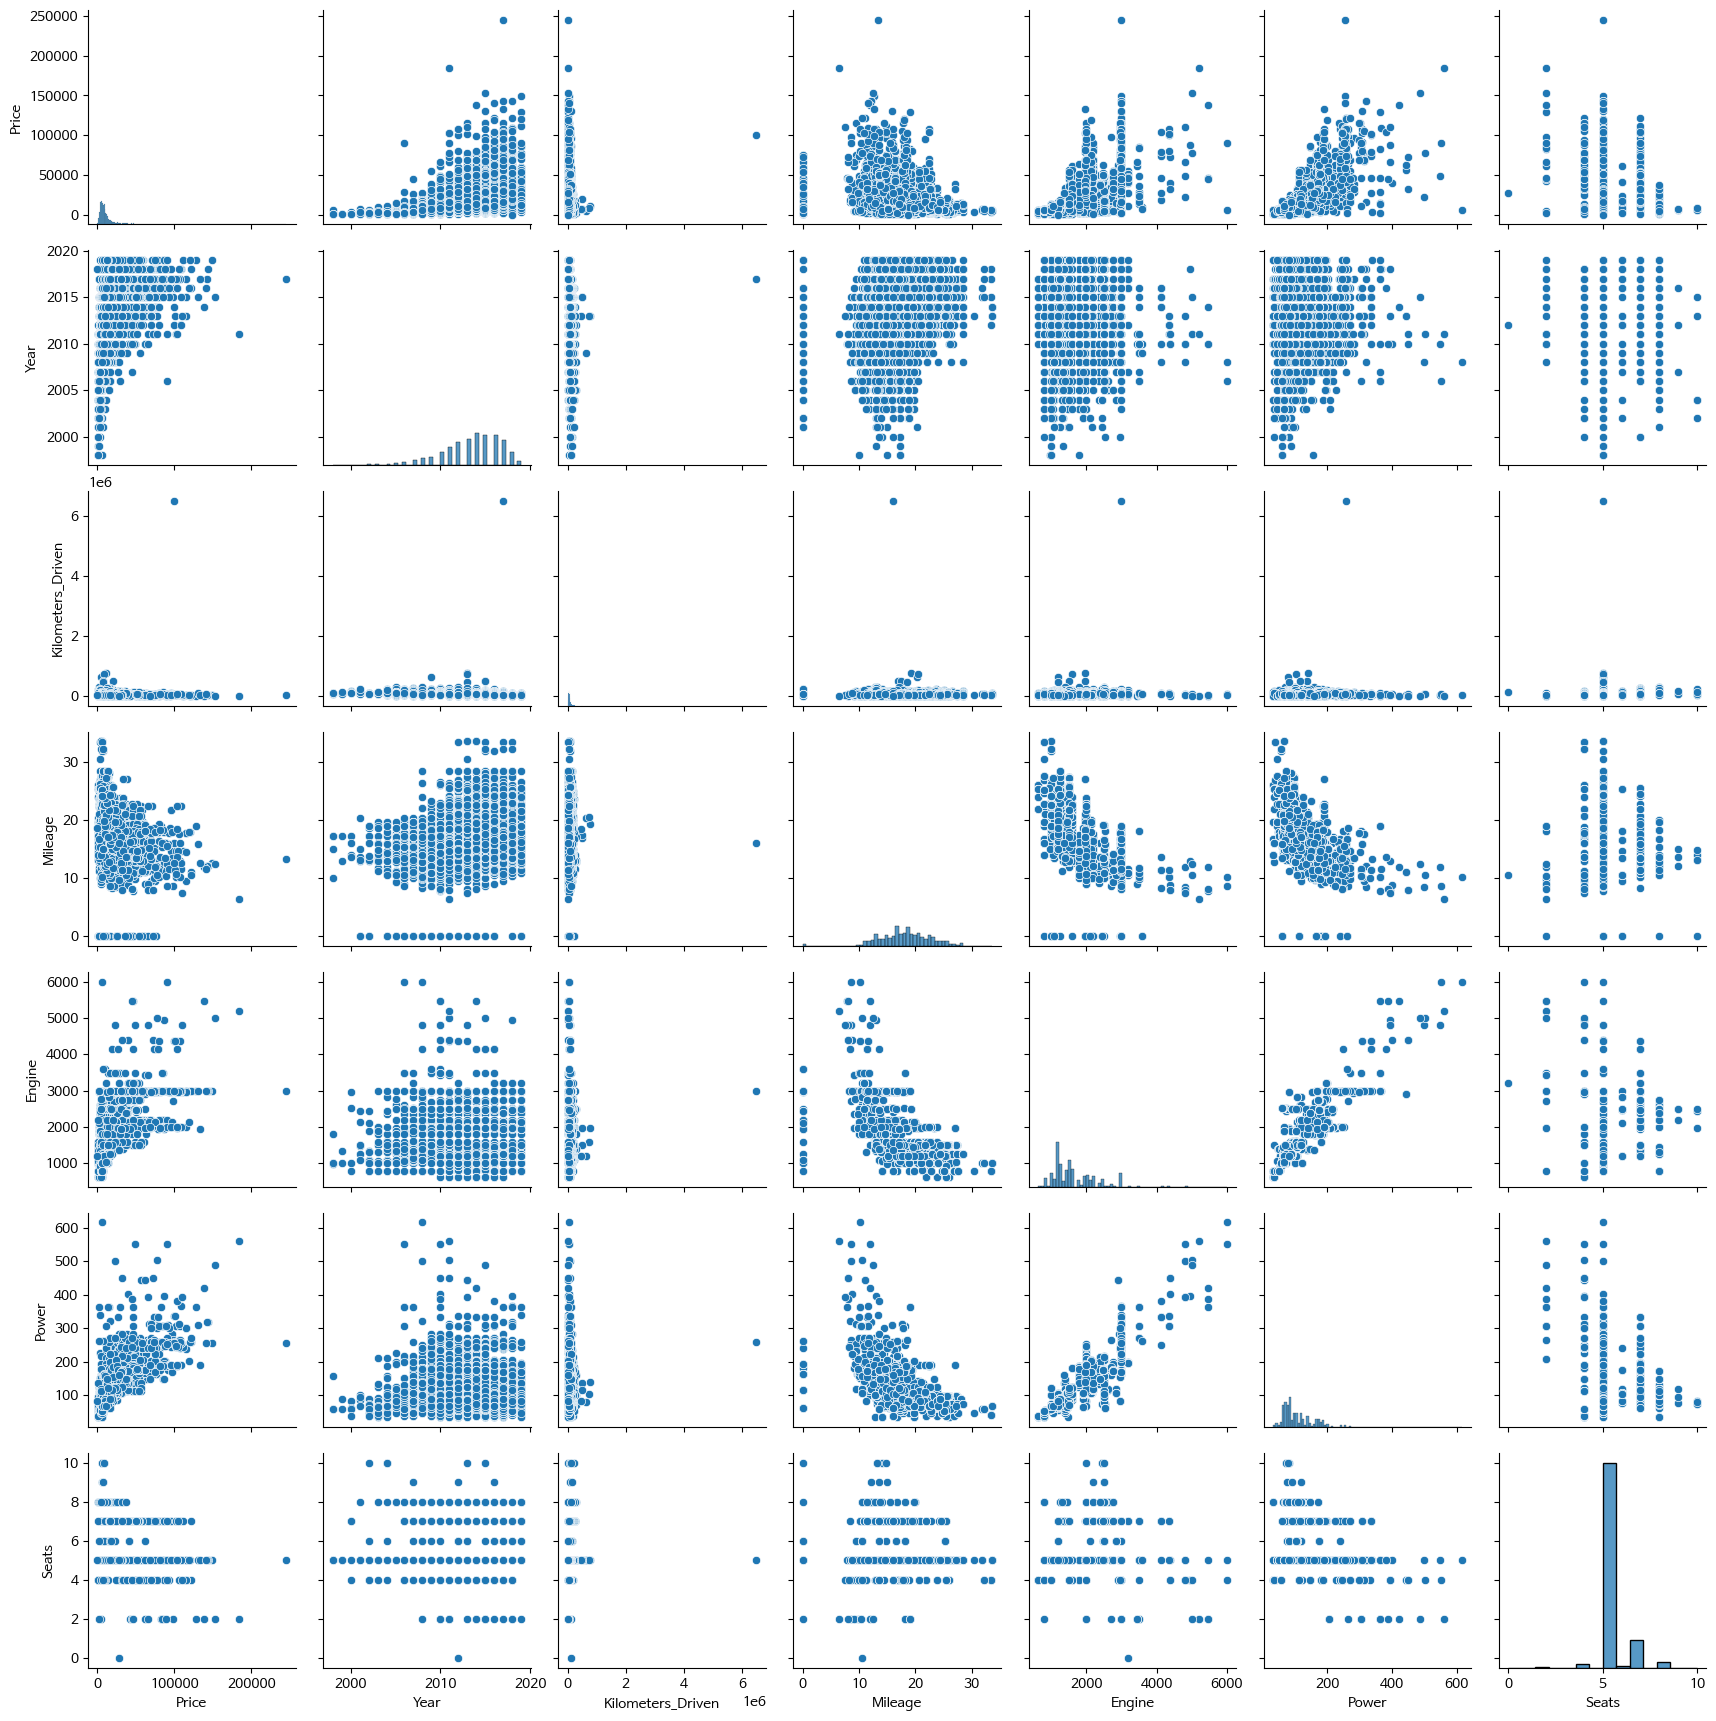

In [102]:
sns.pairplot(df)

In [103]:
df[df['Seats'] == 0] #Seats 수가 0개인 데이터 1개 발견

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income Level
3999,Audi A4 3.2 FSI Tiptronic Quattro,27593.28,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,Audi,상 (부유한)


In [104]:
df = df[df['Seats'] != 0] #Seats수가 0개인 차 삭제(이상치로 판별)

In [105]:
df[df['Mileage'] == 0].count() #Mileage가 0인 값들 발견

,0
Name,56
Price,56
Year,56
Kilometers_Driven,56
Fuel_Type,56
Transmission,56
Owner_Type,56
Mileage,56
Engine,56
Power,28


In [106]:
# Mileage가 0인 데이터 필터링
mileage_zero = df[df['Mileage'] == 0]

# Mileage가 0이 아닌 데이터 중에서 Name과 Fuel_Type이 동일한 데이터 찾기
valid_mileage = df[(df['Mileage'] > 0) & df[['Model']].apply(tuple, axis=1).isin(mileage_zero[['Model']].apply(tuple, axis=1))]

valid_mileage

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income Level
0,Maruti Wagon R LXI CNG,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,상 (부유한)
1,Hyundai Creta 1.6 CRDi SX Option,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,상 (부유한)
3,Maruti Ertiga VDI,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,중 (중산층)
4,Audi A4 New 2.0 TDI Multitronic,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,중 (중산층)
5,Hyundai EON LPG Era Plus Option,3602.46,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,Hyundai,상 (부유한)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7208,Maruti Alto K10 VXI,6269.81,2016,27535,Petrol,Manual,First,24.07,998.0,67.10,5.0,Maruti,중 (중산층)
7218,Maruti Vitara Brezza ZDi Plus AMT,19100.68,2018,3800,Diesel,Automatic,First,24.30,1248.0,88.50,5.0,Maruti,상 (부유한)
7220,Maruti Dzire AMT VDI,13965.27,2017,14300,Diesel,Automatic,First,28.40,1248.0,73.75,5.0,Maruti,상 (부유한)
7235,Maruti Vitara Brezza ZDi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,Maruti,중 (중산층)


In [107]:
df = df[df['Mileage'] != 0]

<Axes: xlabel='Kilometers_Driven'>

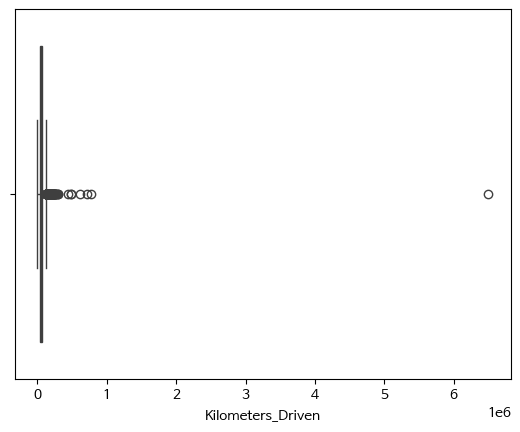

In [108]:
sns.boxplot(x = df['Kilometers_Driven'])

In [109]:
Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1

# IQR 규칙을 사용하여 이상치를 필터링
df = df[~((df['Kilometers_Driven'] < (Q1 - 4 * IQR)) | (df['Kilometers_Driven'] > (Q3 + 4 * IQR)))]

<Axes: xlabel='Kilometers_Driven'>

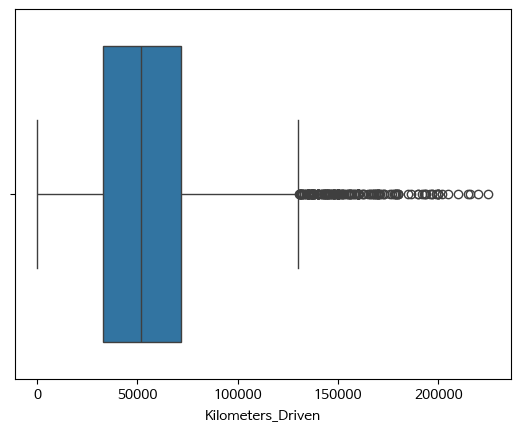

In [110]:
sns.boxplot(x = df['Kilometers_Driven']) #이상치 필터링 후 다시 boxplot 확인

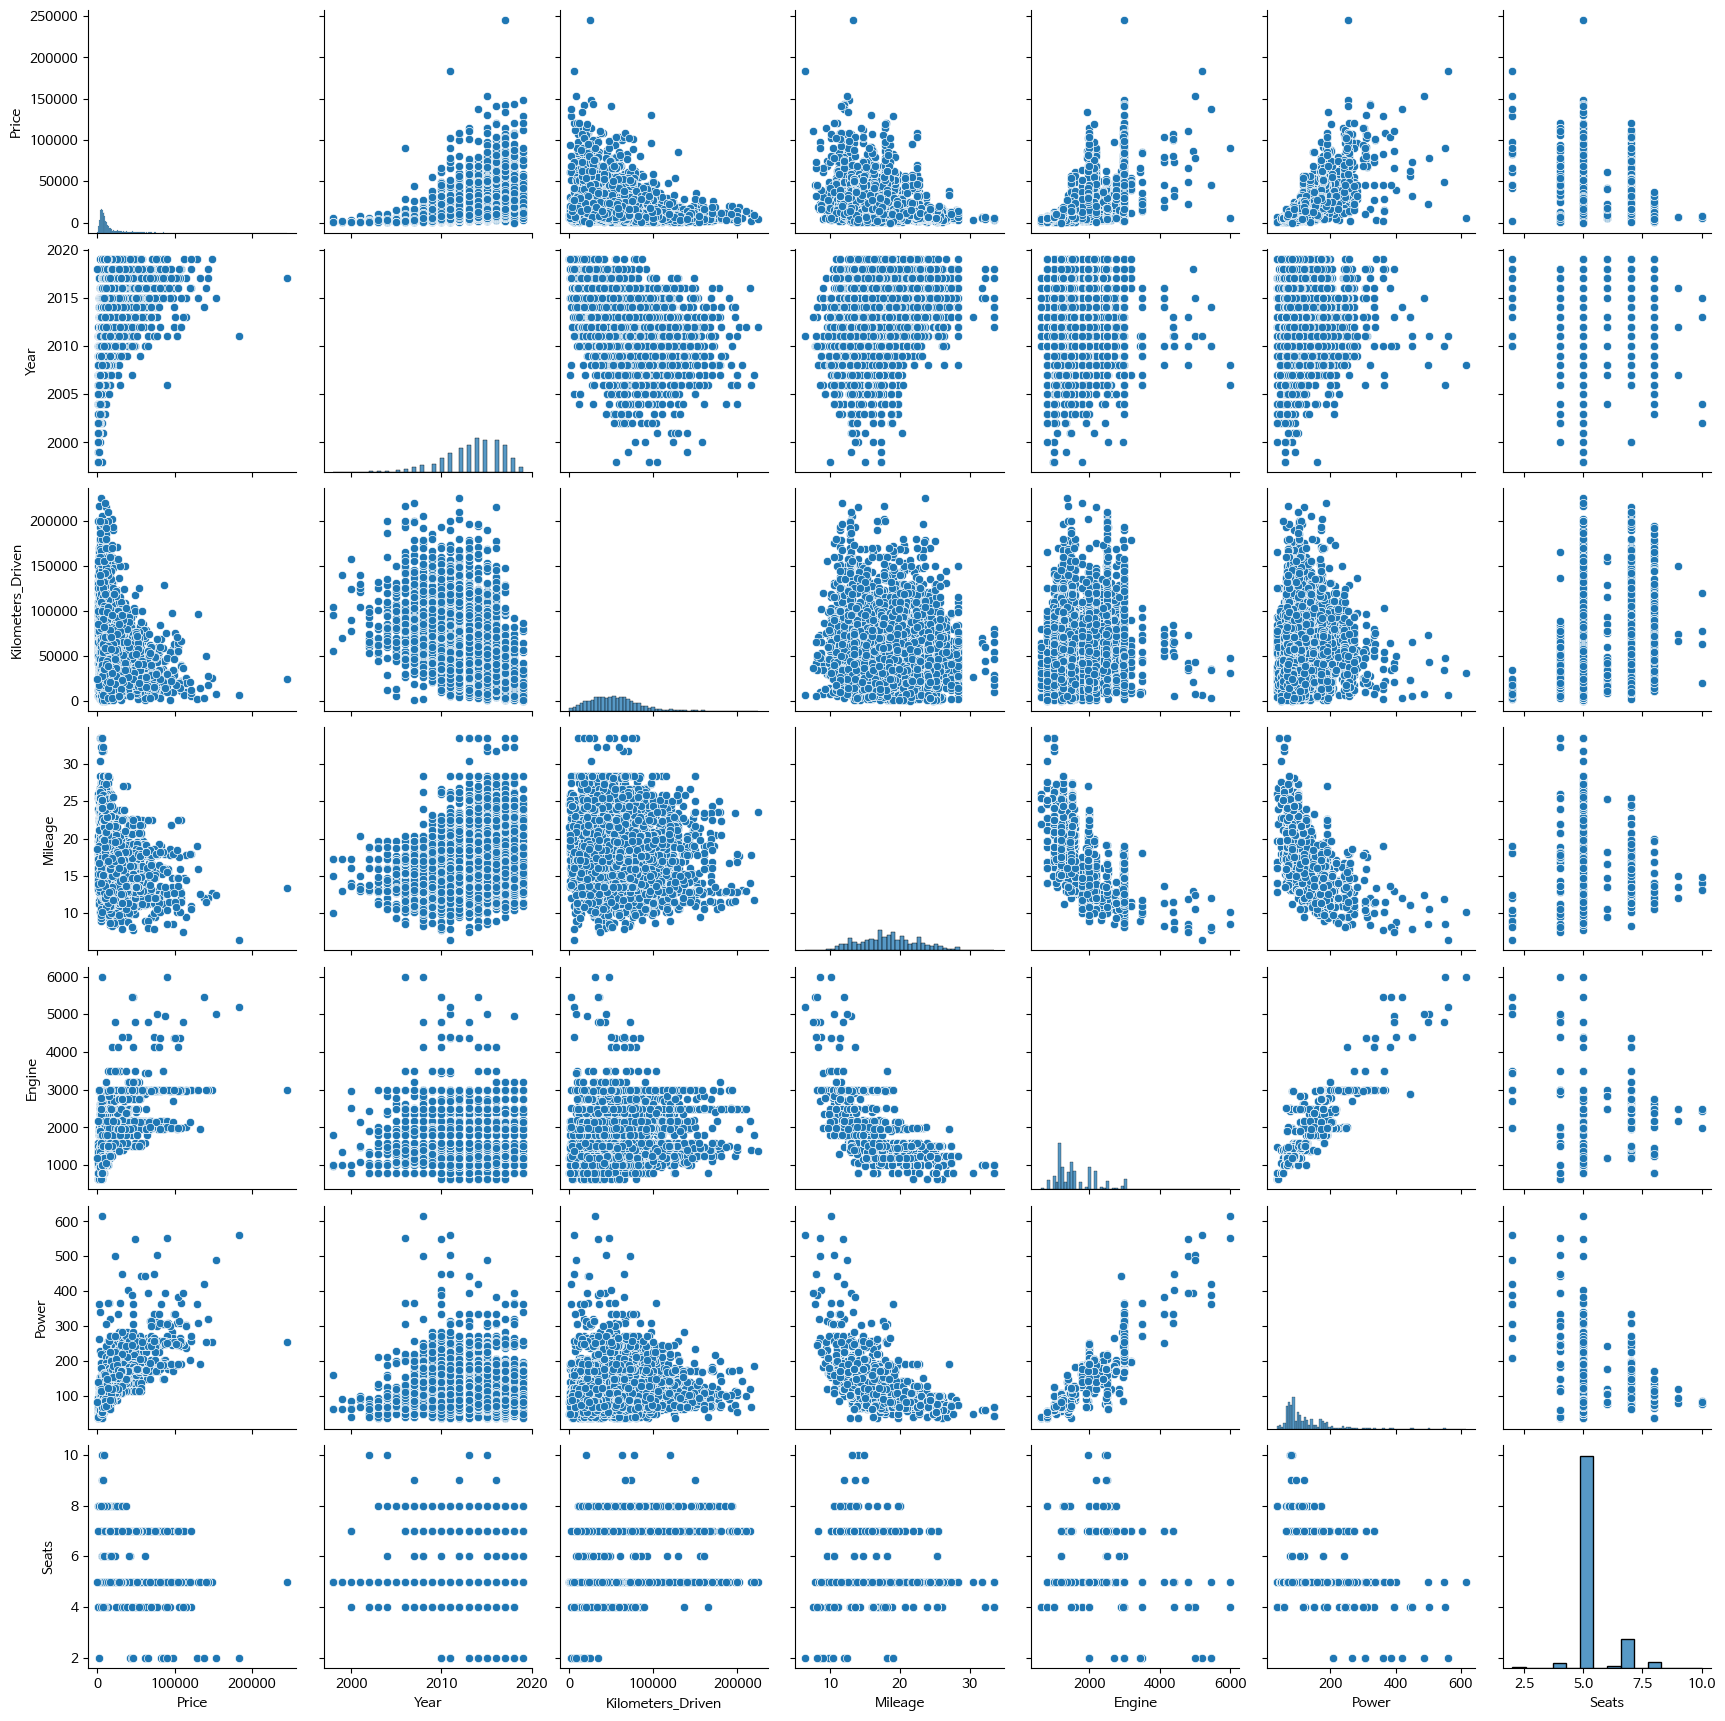

In [111]:
sns.pairplot(df)

In [112]:
df_sorted = df.sort_values(by='Price', ascending=False)
df_sorted.head()

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income Level
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,245273.60,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,Land,상 (부유한)
5781,Lamborghini Gallardo Coupe,183955.20,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,Lamborghini,상 (부유한)
5919,Jaguar F Type 5.0 V8 S,153296.00,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,Jaguar,상 (부유한)
1505,Land Rover Range Rover Sport SE,148804.43,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.0,5.0,Land,중 (중산층)
1974,BMW 7 Series 740Li,143592.36,2018,28060,Petrol,Automatic,First,12.05,2979.0,320.0,5.0,BMW,중 (중산층)


In [113]:
df_sorted = df.sort_values(by='Price', ascending=True)
df_sorted.head()

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income Level
7236,Hyundai Elite i20 Magna Plus,7.08,2018,23955,Petrol,Manual,First,18.6,1197.0,81.86,5.0,Hyundai,중 (중산층)
1713,Tata Nano Lx,674.50,2011,65000,Petrol,Manual,Second,26.0,624.0,35.00,4.0,Tata,상 (부유한)
1628,Maruti 800 Std BSIII,689.83,2004,12000,Petrol,Manual,Second,16.1,796.0,37.00,4.0,Maruti,하 (저소득)
2847,Hyundai Getz GLS,689.83,2005,86000,Petrol,Manual,Second,15.3,1341.0,83.00,5.0,Hyundai,상 (부유한)
3138,Maruti Zen LXI,689.83,1998,95150,Petrol,Manual,Third,17.3,993.0,60.00,5.0,Maruti,하 (저소득)


In [114]:
df = df[~((df['Name'] == 'Hyundai Elite i20 Magna Plus') & (df_raw['Price'] == 7.08))]


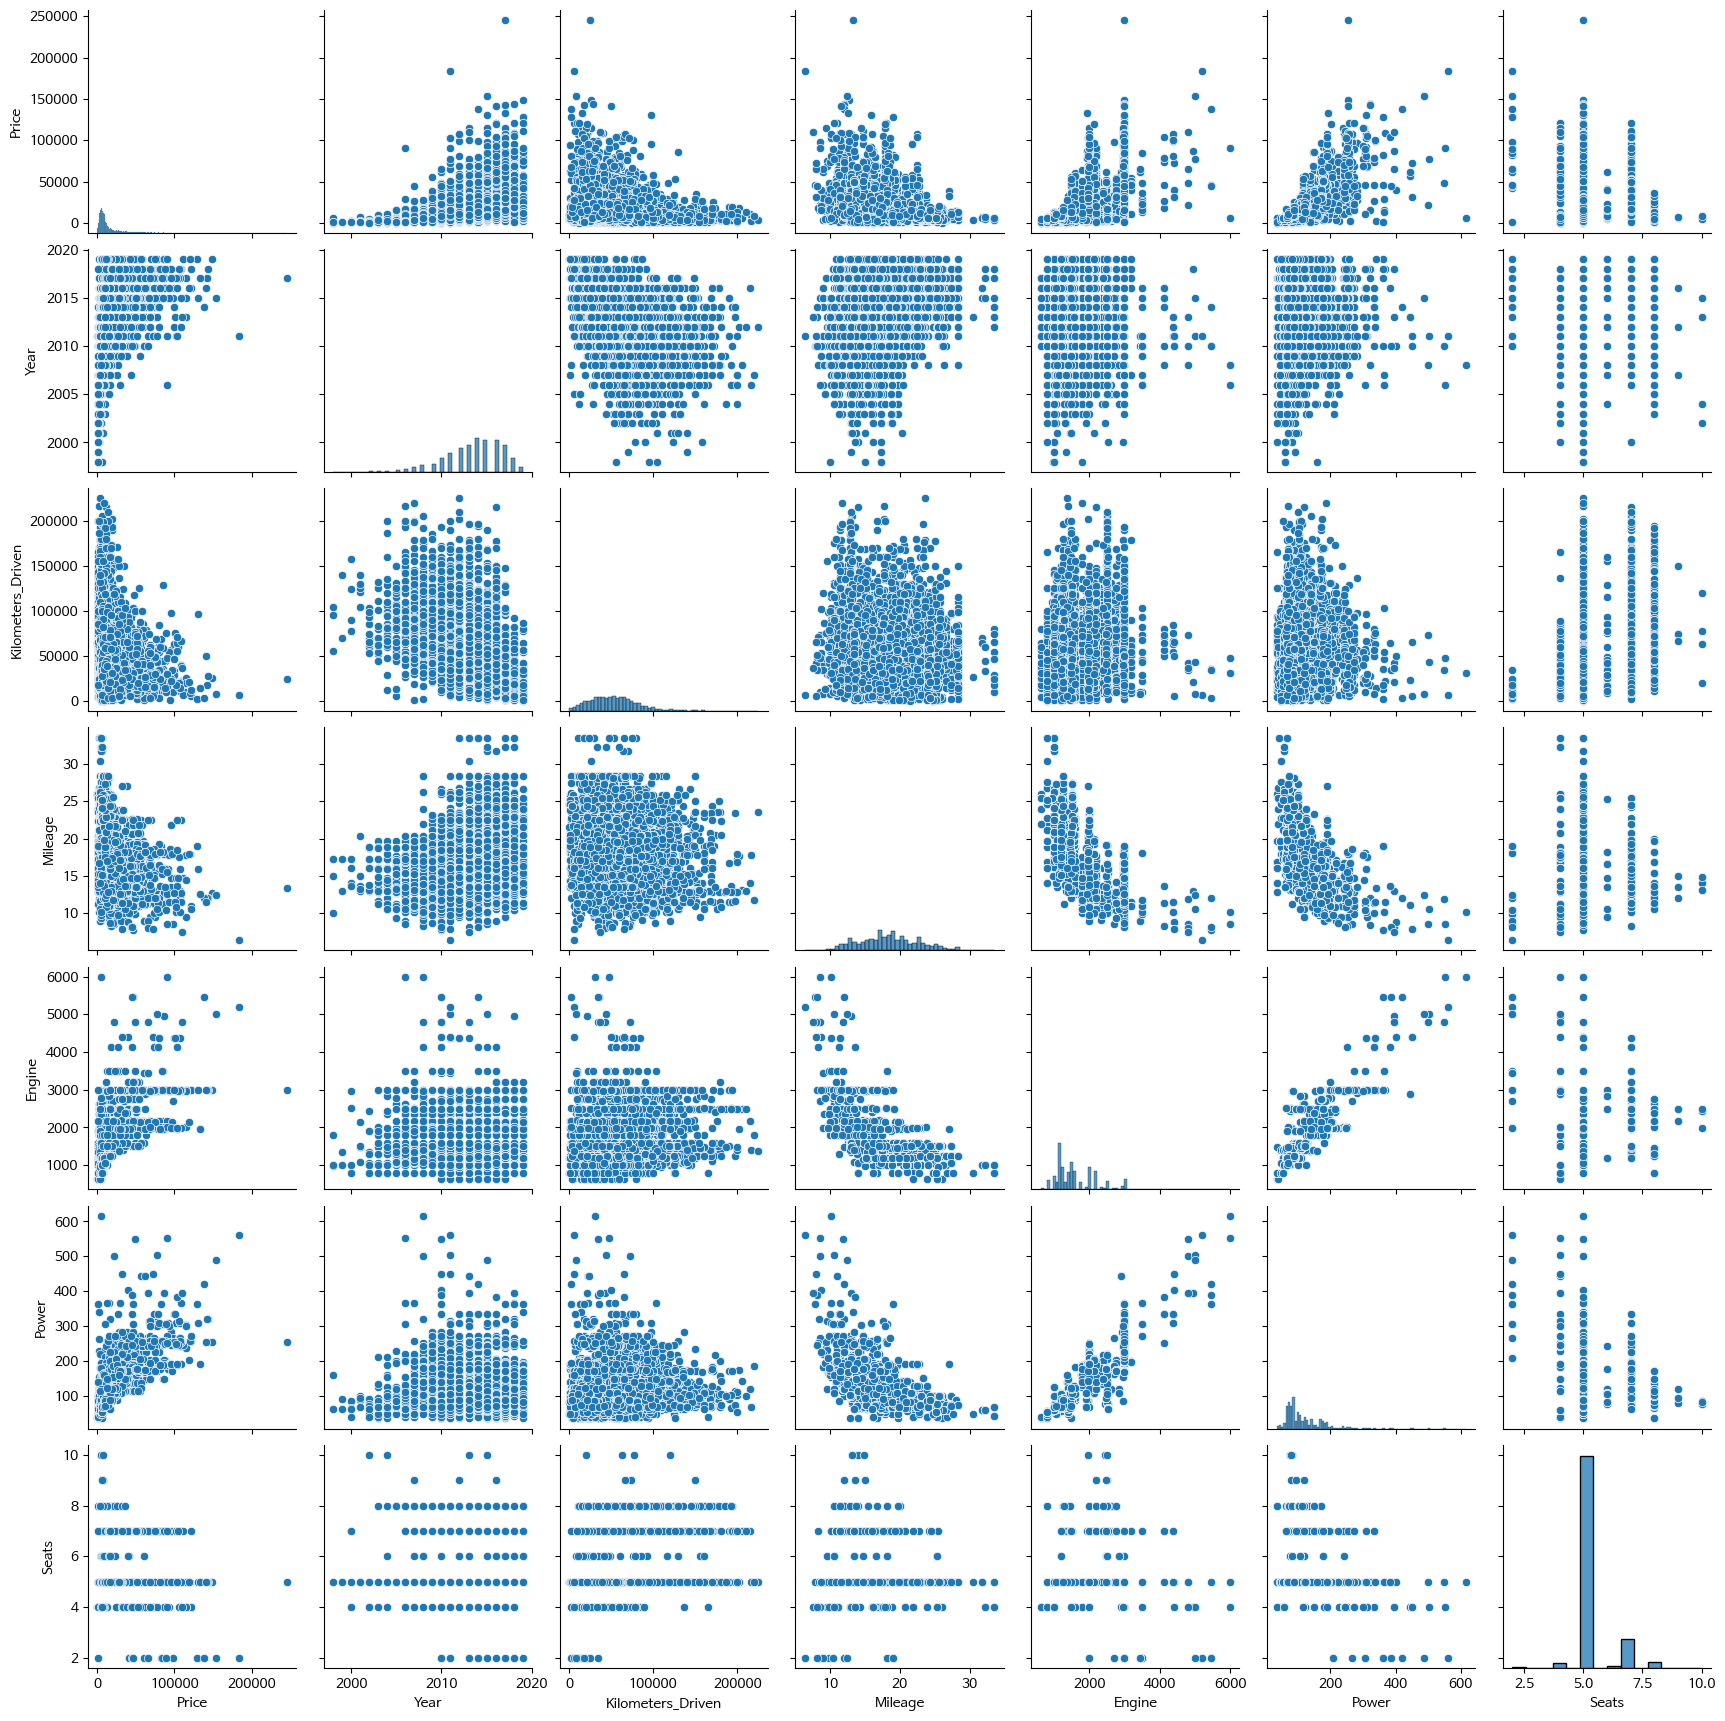

In [115]:
sns.pairplot(df)


In [116]:
df_sorted = df.sort_values(by='Engine', ascending=True)
df_sorted.head()

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income Level
41,Tata Nano LX SE,2345.43,2014,19698,Petrol,Manual,First,25.4,624.0,37.50,4.0,Tata,중 (중산층)
2645,Tata Nano Twist XT,2667.35,2015,19963,Petrol,Manual,Second,25.4,624.0,37.50,4.0,Tata,중 (중산층)
4561,Tata Nano Cx BSIV,2575.37,2014,42083,Petrol,Manual,First,25.4,624.0,37.48,4.0,Tata,중 (중산층)
523,Tata Nano Twist XT,1532.96,2014,18000,Petrol,Manual,Second,25.4,624.0,37.50,4.0,Tata,하 (저소득)
4500,Tata Nano XTA,4292.29,2016,29000,Petrol,Automatic,First,21.9,624.0,37.48,4.0,Tata,상 (부유한)


In [117]:
import numpy as np

# 로그 변환 (log1p 사용하여 0 값 처리)
df['Mileage'] = np.log1p(df['Mileage'])
df['Power'] = np.log1p(df['Power'])
df['Engine'] = np.log1p(df['Engine'])
df

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income Level
0,Maruti Wagon R LXI CNG,2682.68,2010,72000,CNG,Manual,First,3.317816,6.906755,4.080246,5.0,Maruti,상 (부유한)
1,Hyundai Creta 1.6 CRDi SX Option,19162.00,2015,41000,Diesel,Manual,First,3.028683,7.367077,4.845761,5.0,Hyundai,상 (부유한)
2,Honda Jazz V,6898.32,2011,46000,Petrol,Manual,First,2.954910,7.090077,4.496471,5.0,Honda,중 (중산층)
3,Maruti Ertiga VDI,9197.76,2012,87000,Diesel,Manual,First,3.080533,7.130099,4.497139,7.0,Maruti,중 (중산층)
4,Audi A4 New 2.0 TDI Multitronic,27194.71,2013,40670,Diesel,Automatic,Second,2.785011,7.585281,4.954418,5.0,Audi,중 (중산층)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,Datsun GO T Petrol,8477.27,2016,36000,Petrol,Manual,First,3.036394,7.089243,4.219508,5.0,Datsun,중 (중산층)
7228,Tata Tiago 1.05 Revotorq XT Option,10822.70,2016,41413,Diesel,Manual,First,3.342155,6.954639,4.248495,5.0,Tata,상 (부유한)
7231,Ford EcoSport 1.5 Petrol Ambiente,13474.72,2017,39015,Petrol,Manual,First,2.890372,7.311886,4.806968,5.0,Ford,중 (중산층)
7232,Jeep Compass 1.4 Sport,27838.55,2018,6000,Petrol,Manual,First,2.833213,7.221836,5.081404,5.0,Jeep,상 (부유한)


ValueError: could not convert string to float: 'Maruti Wagon R LXI CNG'

In [119]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Model', 'Income Level'])
df_encoded

,Name,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,...,Model_Porsche,Model_Renault,Model_Skoda,Model_Tata,Model_Toyota,Model_Volkswagen,Model_Volvo,Income Level_상 (부유한),Income Level_중 (중산층),Income Level_하 (저소득)
0,Maruti Wagon R LXI CNG,2682.68,2010,72000,3.317816,6.906755,4.080246,5.0,True,False,...,False,False,False,False,False,False,False,True,False,False
1,Hyundai Creta 1.6 CRDi SX Option,19162.00,2015,41000,3.028683,7.367077,4.845761,5.0,False,True,...,False,False,False,False,False,False,False,True,False,False
2,Honda Jazz V,6898.32,2011,46000,2.954910,7.090077,4.496471,5.0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,Maruti Ertiga VDI,9197.76,2012,87000,3.080533,7.130099,4.497139,7.0,False,True,...,False,False,False,False,False,False,False,False,True,False
4,Audi A4 New 2.0 TDI Multitronic,27194.71,2013,40670,2.785011,7.585281,4.954418,5.0,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,Datsun GO T Petrol,8477.27,2016,36000,3.036394,7.089243,4.219508,5.0,False,False,...,False,False,False,False,False,False,False,False,True,False
7228,Tata Tiago 1.05 Revotorq XT Option,10822.70,2016,41413,3.342155,6.954639,4.248495,5.0,False,True,...,False,False,False,True,False,False,False,True,False,False
7231,Ford EcoSport 1.5 Petrol Ambiente,13474.72,2017,39015,2.890372,7.311886,4.806968,5.0,False,False,...,False,False,False,False,False,False,False,False,True,False
7232,Jeep Compass 1.4 Sport,27838.55,2018,6000,2.833213,7.221836,5.081404,5.0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [120]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6076 entries, 0 to 7235
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       6076 non-null   object 
 1   Price                      6076 non-null   float64
 2   Year                       6076 non-null   int64  
 3   Kilometers_Driven          6076 non-null   int64  
 4   Mileage                    6076 non-null   float64
 5   Engine                     6076 non-null   float64
 6   Power                      6002 non-null   float64
 7   Seats                      6076 non-null   float64
 8   Fuel_Type_CNG              6076 non-null   bool   
 9   Fuel_Type_Diesel           6076 non-null   bool   
 10  Fuel_Type_LPG              6076 non-null   bool   
 11  Fuel_Type_Petrol           6076 non-null   bool   
 12  Transmission_Automatic     6076 non-null   bool   
 13  Transmission_Manual        6076 non-null   bool   
 1